# Analisis Exploratorio de Datos (EDA)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import langid
import pandas as pd
import sys
sys.path.insert(0, '../')
import Herramientas as Herr

### EDA de **australian_reviews**

#### Carga de datos

In [2]:
data_reviews = pd.read_csv('../datasets/australian_reviews.csv',encoding='utf-8')
data_reviews

,user_id,user_url,posted,item_id,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011,1250,True,Simple yet with great replayability. In my opi...
1,js41637,http://steamcommunity.com/id/js41637,2014,251610,True,I know what you think when you see this title ...
2,evcentric,http://steamcommunity.com/id/evcentric,2014,248820,True,A suitably punishing roguelike platformer. Wi...
3,doctr,http://steamcommunity.com/id/doctr,2013,250320,True,This game... is so fun. The fight sequences ha...
4,maplemage,http://steamcommunity.com/id/maplemage,2014,211420,True,Git gud
...,...,...,...,...,...,...
59001,SKELETRONPRIMEISOP,http://steamcommunity.com/id/SKELETRONPRIMEISOP,2014,440,True,TF2 is alot of fun and its really good but the...
59002,76561198141079508,http://steamcommunity.com/profiles/76561198141...,2014,304930,True,Fun game with friends
59003,ShadowYT100,http://steamcommunity.com/id/ShadowYT100,2015,265630,True,So Fun!! :D
59004,bestcustomurlevermade,http://steamcommunity.com/id/bestcustomurlever...,2015,304050,True,"This game is great. The only thing is,Why cant..."


In [3]:
Herr.analizar_datos(data_reviews)

,Nombre,Tipos de Datos Únicos,% de Valores No Nulos,% de Valores Nulos,Cantidad de Valores Nulos
0,user_id,[<class 'str'>],100.0,0.0,0
1,user_url,[<class 'str'>],100.0,0.0,0
2,posted,[<class 'int'>],100.0,0.0,0
3,item_id,[<class 'int'>],100.0,0.0,0
4,recommend,[<class 'bool'>],100.0,0.0,0
5,review,[<class 'str'>],100.0,0.0,0


<Axes: xlabel='posted', ylabel='count'>

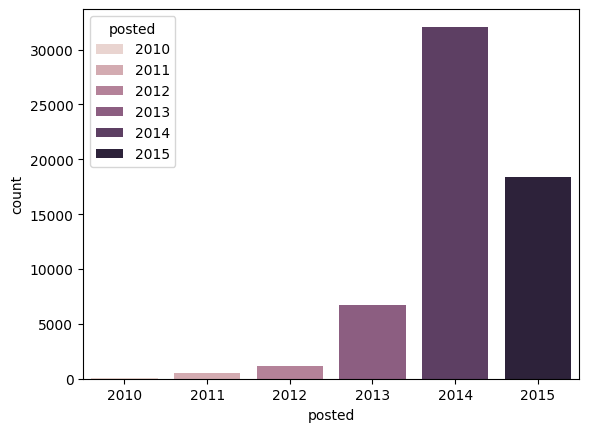

In [4]:
sns.countplot(data_reviews,x='posted',hue='posted')

Vamos a analizar la cantidad de los comentarios segun el idioma y si se pueden tomar medidas

In [5]:
contador_idiomas = {}

for resenia in data_reviews['review']:
    idioma,_ = langid.classify(resenia)
    contador_idiomas[idioma] = contador_idiomas.get(idioma,0) + 1

Tenemos una predominancia de los comentarios en ingles, pero al haber muchos otros cometnarios en diferentes idiomas, no borraremos ya que se considera que si es relevante las cantidades que representa

In [6]:
contador_idiomas

{'en': 50264,
 'de': 339,
 'fr': 302,
 'es': 1208,
 'da': 204,
 'th': 709,
 'pt': 1793,
 'ru': 204,
 'lt': 77,
 'hi': 190,
 'zh': 321,
 'ko': 186,
 'no': 555,
 'wa': 85,
 'br': 29,
 'ne': 207,
 'km': 58,
 'af': 30,
 'sv': 152,
 'eu': 89,
 'nl': 366,
 'it': 327,
 'mk': 3,
 'sk': 51,
 'mr': 33,
 'an': 20,
 'nb': 17,
 'nn': 61,
 'la': 78,
 'pl': 195,
 'is': 12,
 'cs': 29,
 'cy': 45,
 'az': 10,
 'et': 74,
 'ka': 16,
 'ca': 19,
 'ja': 32,
 'ms': 20,
 'se': 2,
 'tl': 19,
 'id': 68,
 'mt': 60,
 'be': 3,
 'fi': 66,
 'xh': 9,
 'ro': 33,
 'sl': 49,
 'ur': 5,
 'tr': 32,
 'gl': 24,
 'eo': 22,
 'vi': 5,
 'rw': 6,
 'hy': 34,
 'hu': 22,
 'sr': 7,
 'sq': 6,
 'zu': 1,
 'am': 11,
 'bg': 9,
 'or': 1,
 'oc': 2,
 'ug': 5,
 'sw': 8,
 'mn': 5,
 'lv': 10,
 'uk': 3,
 'he': 3,
 'lo': 4,
 'hr': 8,
 'lb': 4,
 'kk': 9,
 'bs': 5,
 'bn': 3,
 'vo': 3,
 'qu': 4,
 'mg': 12,
 'ml': 1,
 'ga': 1,
 'ht': 4,
 'fo': 2,
 'fa': 1,
 'ar': 2,
 'ku': 1,
 'ky': 1,
 'jv': 1}

Ahora haremos el analisis de sentimiento

In [4]:
data_reviews['sentiment_analysis'] = data_reviews['review'].apply(Herr.analisis_sentimiento)

Se hizo el analisis de sentimiento y ahora eliminamos la columna reviews dado qu ya tenemos los datos necesarios

In [5]:
data_reviews = data_reviews.drop('review',axis=1)


In [6]:
data_reviews

,user_id,user_url,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011,1250,True,1
1,js41637,http://steamcommunity.com/id/js41637,2014,251610,True,1
2,evcentric,http://steamcommunity.com/id/evcentric,2014,248820,True,1
3,doctr,http://steamcommunity.com/id/doctr,2013,250320,True,2
4,maplemage,http://steamcommunity.com/id/maplemage,2014,211420,True,1
...,...,...,...,...,...,...
59001,SKELETRONPRIMEISOP,http://steamcommunity.com/id/SKELETRONPRIMEISOP,2014,440,True,1
59002,76561198141079508,http://steamcommunity.com/profiles/76561198141...,2014,304930,True,1
59003,ShadowYT100,http://steamcommunity.com/id/ShadowYT100,2015,265630,True,2
59004,bestcustomurlevermade,http://steamcommunity.com/id/bestcustomurlever...,2015,304050,True,1


<Axes: xlabel='sentiment_analysis', ylabel='count'>

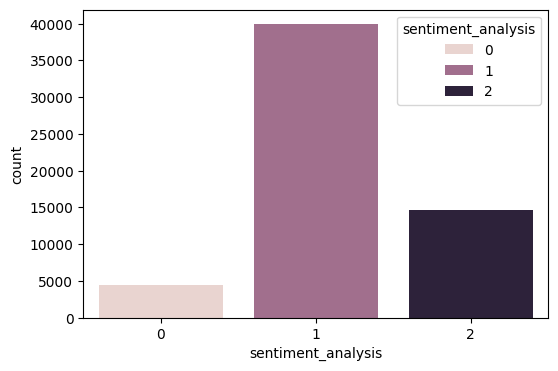

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data_reviews,x='sentiment_analysis',hue='sentiment_analysis')

In [7]:
cantidad_registros = data_reviews.shape[0]
cantidad_sentimientos = data_reviews['sentiment_analysis'].value_counts()
porcentaje_sentimiento = round((cantidad_sentimientos/cantidad_registros)*100,2)
print(f'Los valores de sentiment analysis\n{cantidad_sentimientos.to_string(header=(False))}\nEl porcentaje de cada valor\n{porcentaje_sentimiento.to_string(header=(False))}')

Los valores de sentiment analysis
1    39911
2    14661
0     4434
El porcentaje de cada valor
1    67.64
2    24.85
0     7.51


In [8]:
Herr.analizar_datos(data_reviews)

,Nombre,Tipos de Datos Únicos,% de Valores No Nulos,% de Valores Nulos,Cantidad de Valores Nulos
0,user_id,[<class 'str'>],100.0,0.0,0
1,user_url,[<class 'str'>],100.0,0.0,0
2,posted,[<class 'int'>],100.0,0.0,0
3,item_id,[<class 'int'>],100.0,0.0,0
4,recommend,[<class 'bool'>],100.0,0.0,0
5,sentiment_analysis,[<class 'int'>],100.0,0.0,0


In [10]:
Herr.cantidad_porcentaje(data_reviews,'sentiment_analysis')

Los valores de sentiment_analysis
1    39911
2    14661
0     4434
El porcentaje de cada valor
1    67.64
2    24.85
0     7.51


<Axes: xlabel='recommend', ylabel='count'>

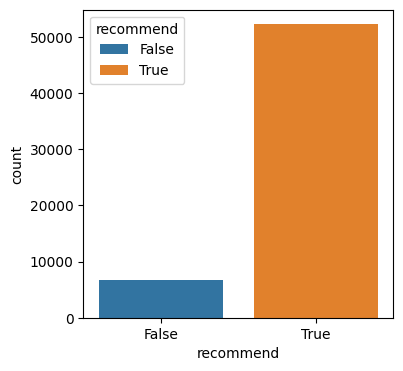

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(data_reviews,x='recommend',hue='recommend')

In [11]:
Herr.cantidad_porcentaje(data_reviews,'recommend')

Los valores de recommend
True     52206
False     6800
El porcentaje de cada valor
True     88.48
False    11.52


acordarse de exportar el csv con la actualizacion de analisis de sentimiento